# Prepare a classification model using SVM for salary data 

In [68]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn import metrics 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

# 1. Data collection and description

In [69]:
from google.colab import files
uploaded= files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1) (1).csv


In [70]:
from google.colab import files
uploaded= files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (1).csv


In [71]:
train_= pd.read_csv('SalaryData_Train(1).csv')
test_= pd.read_csv('SalaryData_Test(1).csv')

In [72]:
df_= test_.append(train_)

In [102]:
df_

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [73]:
test= test_.copy()
train= train_.copy()

In [74]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [75]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
str_c= ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [77]:
number= LabelEncoder()

In [78]:
for i in str_c:
  train[i]= number.fit_transform(train[i])
  test[i]= number.fit_transform(test[i])

In [79]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [80]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [81]:
label_encoder= preprocessing.LabelEncoder()

In [82]:
train1= train.apply(LabelEncoder().fit_transform)
train1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [83]:
test1= test.apply(LabelEncoder(). fit_transform)
test1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [84]:
df= train1.append(test1)

In [85]:
df1= df.copy()

In [86]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [87]:
df1.shape

(45221, 14)

In [88]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,21.546140,13.210559,0.0,11.0,20.0,30.0,72.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,9.118463,2.552909,0.0,8.0,9.0,12.0,15.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,6.369762,22.719427,0.0,0.0,0.0,0.0,117.0


In [89]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# 2. Finding Correlation

In [90]:
corr= df1.corr()

<AxesSubplot:>

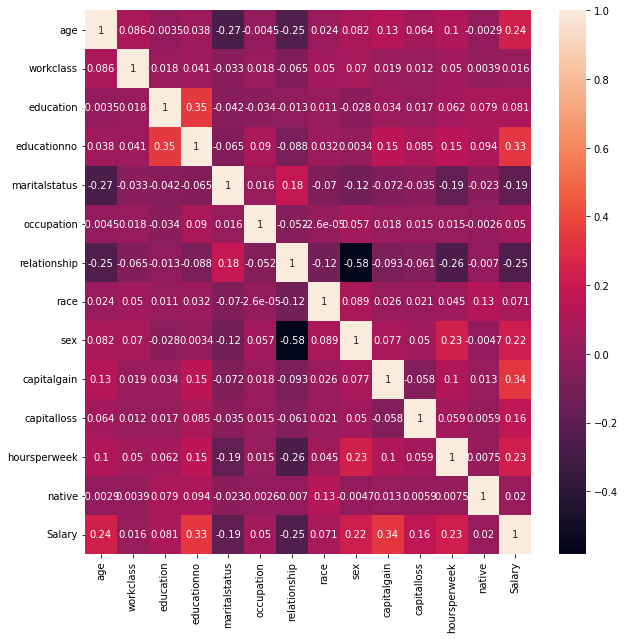

In [91]:
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot= True)

In [92]:
plt.rcParams['figure.figsize']= 9,5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


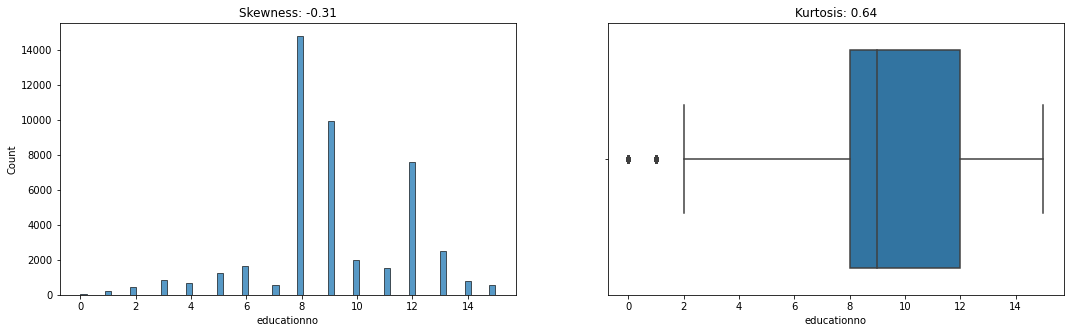

In [93]:
# Select the column for which you want to create the plot
educa= df1['educationno']

# Calculate skewness and kurtosis
skewness = educa.skew()
kurtosis = educa.kurtosis()

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5))

# Plot skewness using histogram
sns.histplot(educa, ax=ax1)
ax1.set_title(f'Skewness: {skewness:.2f}')

# Plot kurtosis using box plot
sns.boxplot(educa, ax=ax2)
ax2.set_title(f'Kurtosis: {kurtosis:.2f}')

# Show the plot
plt.show()

# The Data is negatively skewed and has low kurtosis value
## Most of people have eduction Number of years of education 9 - 10

In [100]:
dfa= df_[df_.columns[0:13]]
obj_colum= dfa.select_dtypes(include= 'object').columns.tolist()

ValueError: ignored

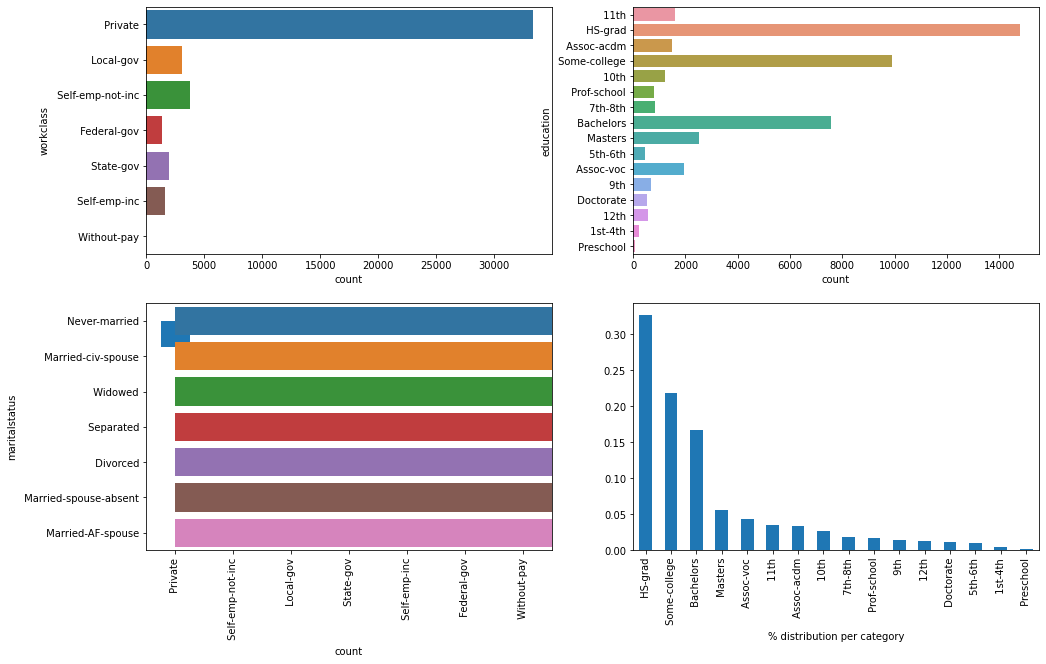

In [101]:
plt.figure(figsize= (16,10))
for i, col in enumerate(obj_colum,1):
  plt.subplot(2,2,i)
  sns.countplot(data= dfa, y=col)
  plt.subplot(2,2,i+2)
  df_[col].value_counts(normalize=True).plot.bar()
  plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

###Majority of the workclass is in Private Sector
###Also for education mojority of the people have HS graduation or some college degree

# 3. SVM

In [121]:
col= df1.columns

In [129]:
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]

In [130]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [131]:

x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# 3.1 Linear

In [132]:
#LINEAR SUPPORT VECTOR MACHINE

model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8098273572377158


# 3.2 Poly

In [133]:
#POLY SUPPORT VECTOR MACHINE
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8435590969455511


# 3.3 RBF

In [134]:
# RBF SUPPORT VECTOR MACHINE
model_rbf= SVC(kernel= 'rbf')
model_rbf.fit(x_train, y_train)
pred_test_rbf= model_rbf.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


# 3.4 Sigmoid

In [135]:
# Sigmoid SUPPORT VECTOR MACHINE
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.5768924302788845


In [137]:
from sklearn.metrics import classification_report
model= SVC()
model.fit(x_train, y_train)
pred= model.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

       <=50K       0.94      0.87      0.90     12328
        >50K       0.55      0.75      0.63      2732

    accuracy                           0.84     15060
   macro avg       0.74      0.81      0.77     15060
weighted avg       0.87      0.84      0.85     15060



In [138]:
np.mean(pred==y_test)

0.8432934926958832

# 4 - Conclusion
# Poly Model gives the best accuracy